In [1]:
from model_training import *
import pandas as pd
import numpy as np
from scripts.essentials import *
from scripts.plots import *
from scripts.train_utilities import *
from neuralforecast.losses.pytorch import MQLoss, MSE
import json
import os
from datetime import datetime
import torch
from sklearn.metrics import mean_squared_error

c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\szymo\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Nie można odnaleźć określonej procedury
  warn(f"Failed to load image Python extension: {e}")


In [32]:
# C:\Users\szymo\LBN-INZ\CODE\model_training\results\NFLX\financial_and_news\NBEATS\test_pred_20231226_005245.csv
# C:\Users\szymo\LBN-INZ\CODE\model_training\results\NFLX\financial_and_news\NBEATS\test_pred_20231226_010552.csv
# C:\Users\szymo\LBN-INZ\CODE\model_training\results\NFLX\financial_and_news\NBEATS\test_pred_20231226_162158.csv
# C:\Users\szymo\LBN-INZ\CODE\model_training\results\NFLX\financial_and_news\NHITS\val_pred_20231226_164542.csv
val = pd.read_csv('results/NFLX/financial_and_news/TFT/val_pred_20231226_164542.csv')
test = pd.read_csv('results/NFLX/financial_and_news/TFT/test_pred_20231226_164542.csv')

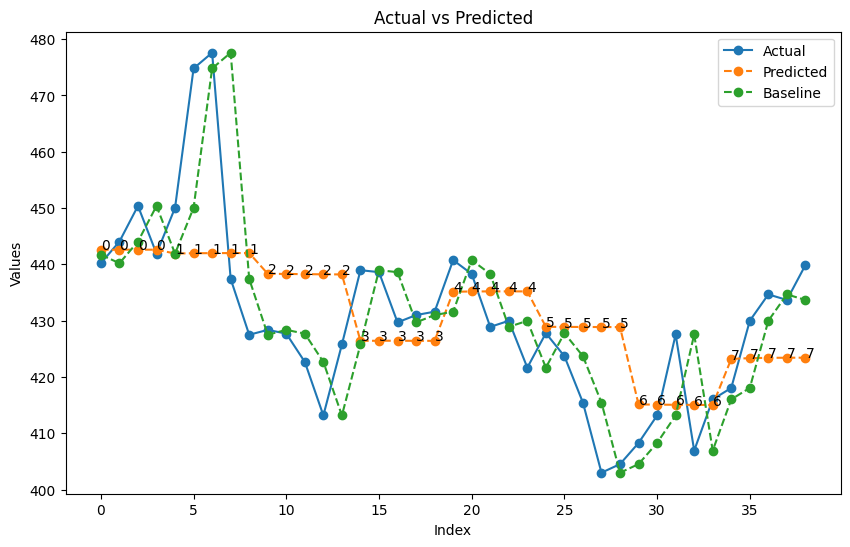

In [33]:
plot_actual_vs_predicted(val['y'][1:].reset_index(drop=True), val['TFT'][1:].reset_index(drop=True), val['y'].shift(1)[1:].reset_index(drop=True), val['modelID'][1:].reset_index(drop=True))

In [63]:
timestamps = {
    'close_price': {2:'20231226_171727',
                    5:'20231226_174213'},
    'log_return_1': {2:'20231226_175514',
                    5:'20231226_182315'},
    'log_return_5': {2:'20231226_201326',
                    5:'20231226_210348'},
}

timestamps_no_season = {
    'close_price': {2:'20231227_140802',
                    5:'20231227_141917'},
    'log_return_1': {2:'20231227_142506',
                    5:'20231227_143356'},
    'log_return_5': {2:'20231227_145153',
                    5:'20231227_151741'},
}

In [37]:
model_types = ['NBEATS', 'NHITS', 'TFT']

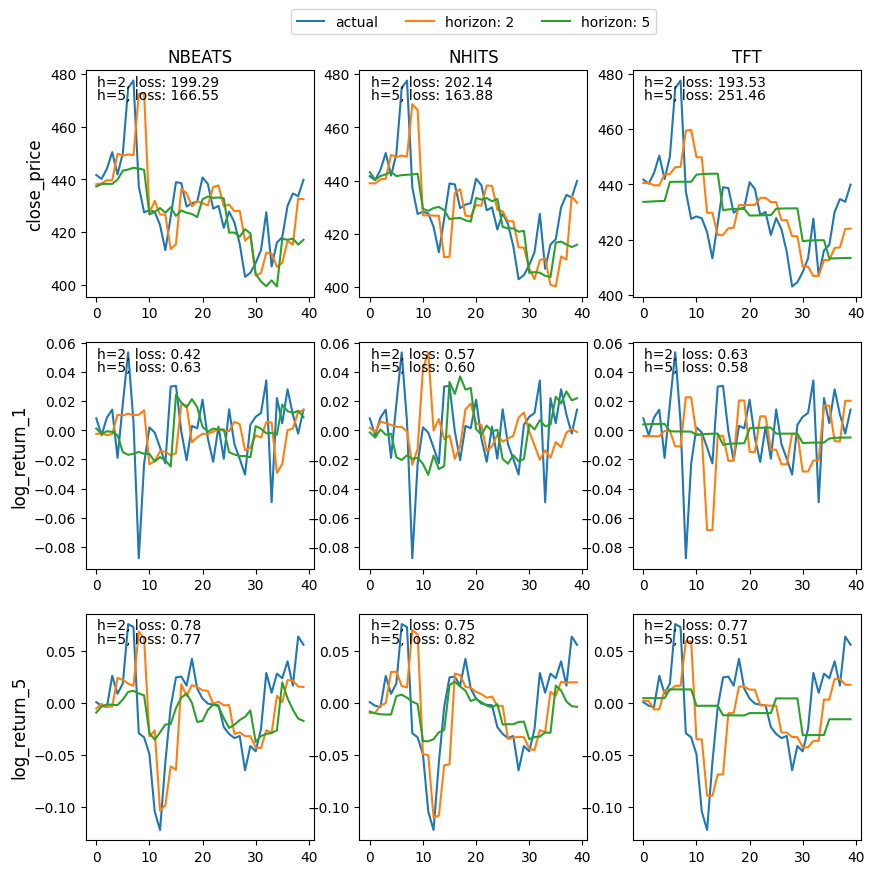

In [65]:
import json

# Create 3x3 sub plots
i=1
fig = plt.figure(figsize=(10, 10))
for target in timestamps:
    for model_type in model_types:
        if model_type == 'NBEATS':
            pred2 = pd.read_csv('results/NFLX/financial_and_news/'+model_type+'/val_pred_'+timestamps_no_season[target][2]+'.csv')
            with open('results/NFLX/financial_and_news/'+model_type+'/loss_'+timestamps_no_season[target][2]+'.json') as json_file:
                loss2 = json.load(json_file)['val']
            pred5 = pd.read_csv('results/NFLX/financial_and_news/'+model_type+'/val_pred_'+timestamps_no_season[target][5]+'.csv')
            with open('results/NFLX/financial_and_news/'+model_type+'/loss_'+timestamps_no_season[target][5]+'.json') as json_file:
                loss5 = json.load(json_file)['val']
        else:
            pred2 = pd.read_csv('results/NFLX/financial_and_news/'+model_type+'/val_pred_'+timestamps[target][2]+'.csv')
            with open('results/NFLX/financial_and_news/'+model_type+'/loss_'+timestamps[target][2]+'.json') as json_file:
                loss2 = json.load(json_file)['val']
            pred5 = pd.read_csv('results/NFLX/financial_and_news/'+model_type+'/val_pred_'+timestamps[target][5]+'.csv')
            with open('results/NFLX/financial_and_news/'+model_type+'/loss_'+timestamps[target][5]+'.json') as json_file:
                loss5 = json.load(json_file)['val']
        
        #fig = plt.figure(figsize=(10, 10))
        ax1 = fig.add_subplot(len(model_types), len(timestamps), i)
        ax1.plot(pred2['y'].reset_index(drop=True), label='actual')
        ax1.plot(pred2[f'{model_type}'].reset_index(drop=True), label=f'horizon: 2')
        ax1.plot(pred5[f'{model_type}'].reset_index(drop=True), label=f'horizon: 5')
        # smaller legend
        #ax1.legend()
        # Add annotation about the loss
        ax1.annotate(f'h=2, loss: {loss2:.2f}', xy=(0.05, 0.93), xycoords='axes fraction')
        ax1.annotate(f'h=5, loss: {loss5:.2f}', xy=(0.05, 0.87), xycoords='axes fraction')
        #ax1.set_title(f'Validation | {target} | {model_type}')
        if i==2:
            # create legend in row with the title in left upper corner
            ax1.legend(bbox_to_anchor=(0.5, 1.3), loc='upper center', ncols=3)
            # ax1.legend( loc='lower center', ncols=3)
        if i in [1,2,3]:
            ax1.set_title(f'{model_type}', size='large')
        if i in [1,4,7]:
            ax1.set_ylabel(f'{target}', size='large')
        i+=1
        # ax2 = fig.add_subplot(3, 3, 2)
        # ax2.plot(pred5['y'][1:].reset_index(drop=True), label='actual')
        # ax2.plot(pred5['TFT'][1:].reset_index(drop=True), label='TFT')
        # ax2.plot(pred5['y'].shift(1)[1:].reset_index(drop=True), label='previous')
        # ax2.legend()
        # ax2.set_title('val 5')
        # ax3 = fig.add_subplot(3, 3, 3)
        # ax3.plot(pred2['y'][1:].reset_index(drop=True), label='actual')
        # ax3.plot(pred2['TFT'][1:].reset_index(drop=True), label='TFT')
        # ax3.plot(pred2['y'].shift(1)[1:].reset_index(drop=True), label='previous')
        # ax3.legend()
        # ax3.set_title('val 2')
# set titles to columns and rows
# for ax, col in zip(fig, ['NBEATS', 'NHITS', 'TFT']):
#     ax.set_ylabel(col, rotation=90, size='large')
# for ax, row in zip(fig, ['close_price', 'log_return_1', 'log_return_5']):
#     ax.set_title(row, size='large')
# plt.tight_layout()
# plt.show()
